In [46]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt
from time import sleep
import bs4
import re

def get_result_info_of_page(page_source):
    soup = bs4.BeautifulSoup(page_source, 'html.parser')
    result = {}

    for elem in soup.find_all("div", {"class": "cXedhc"}):
        title = elem.find('div', {'class' : 'dbg0pd'}).find('div').getText()
        details = elem.find('span', {'class' : 'rllt__details'})

        phone_reg = re.compile(r'\d{2} \d{2} \d{2} \d{2}')
        phones = phone_reg.search(details.getText())
        stars = details.find('span', {'class' : 'BTtC6e'})

        result[title] = (phones.group() if phones != None else 'No Phone', float(stars.getText().replace(',', '.')) if stars != None else 0)
    return result

browser = webdriver.Firefox()
browser.get('http://www.google.dk')
browser.implicitly_wait(3)

search_field = browser.find_element_by_name('q')
search_field.send_keys('copenhagen school')
search_field.submit()

browser.find_element_by_class_name('cMjHbjVt9AZ__button').click()
sleep(1)

search_results = {}
search_results = {**search_results, **get_result_info_of_page(browser.page_source)}

page = 2
while True:
    try:
        browser.find_element_by_xpath("//a[@aria-label='Page {}']".format(page)).click()
    except NoSuchElementException:
        break
    sleep(3)
    search_results = {**search_results, **get_result_info_of_page(browser.page_source)}
    page += 1

browser.quit()
print(search_results)

[val[1] for val in search_results.values()]

{'Copenhagen School of Entrepreneurship': ('38 15 36 46', 4.8), 'KEA Københavns Erhvervsakademi - Main Campus': ('46 46 00 00', 4.4), 'School of Global Health': ('35 32 67 07', 5.0), 'KEA Copenhagen School of Design and Technology - Københavns Erhvervsakademi': ('46 46 04 00', 3.9), 'The European School of Copenhagen': ('36 14 01 90', 4.3), 'Copenhagen International School': ('39 46 33 00', 3.3), 'Copenhagen Business School': ('38 15 38 15', 4.1), 'Kea': ('46 46 00 00', 5.0), 'Københavns Mode- og Designskole - Copenhagen Academy of Fashion Design': ('33 32 88 10', 4.0), 'Bjørns Internationale Skole': ('39 29 29 37', 4.0), 'CISPA - Copenhagen International School of Performing Arts': ('31 37 38 47', 4.3), 'International School of Hellerup': ('70 20 63 68', 3.6), 'Rygaards International School': ('39 62 10 53', 4.0), 'Copenhagen Business School - Howitzvej': ('38 15 38 15', 5.0), 'Den Lille Skole I København': ('38 60 16 16', 4.5), 'Copenhagen Business School - Dalgas Have': ('38 15 38 1

[4.8,
 4.4,
 5.0,
 3.9,
 4.3,
 3.3,
 4.1,
 5.0,
 4.0,
 4.0,
 4.3,
 3.6,
 4.0,
 5.0,
 4.5,
 4.9,
 5.0,
 4.7,
 3.8,
 5.0,
 0,
 4.5,
 4.0,
 1.0,
 5.0,
 4.3,
 4.0,
 4.4,
 4.8,
 4.3,
 3.6,
 4.0,
 0,
 0,
 3.9,
 4.0,
 4.8,
 3.9,
 4.0,
 3.4,
 0,
 5.0,
 3.8,
 4.9,
 4.2,
 0,
 0,
 0,
 4.3,
 0,
 3.6,
 0,
 4.4,
 3.4,
 0,
 0,
 0,
 3.8,
 5.0,
 2.9,
 2.8,
 0,
 0,
 0,
 2.7,
 5.0,
 3.8,
 5.0,
 4.1,
 3.7,
 4.3,
 5.0,
 4.5,
 0,
 5.0,
 2.6,
 3.7,
 0,
 5.0,
 4.0,
 3.4,
 0,
 3.6,
 5.0,
 4.1,
 0,
 4.6,
 0,
 3.1,
 0,
 3.3,
 4.0,
 0,
 5.0,
 4.0,
 0,
 0,
 4.8,
 2.7,
 0,
 4.0,
 4.0,
 3.9,
 5.0,
 0,
 4.2,
 5.0,
 4.3,
 3.2,
 3.9,
 0,
 0,
 4.3,
 5.0,
 0,
 2.5,
 0,
 5.0,
 3.9,
 5.0,
 4.4,
 3.9,
 4.0,
 3.0,
 4.4,
 3.0,
 4.9,
 0,
 0,
 4.4,
 5.0]

Text(0.5, 1.0, 'Titles and phones from search')

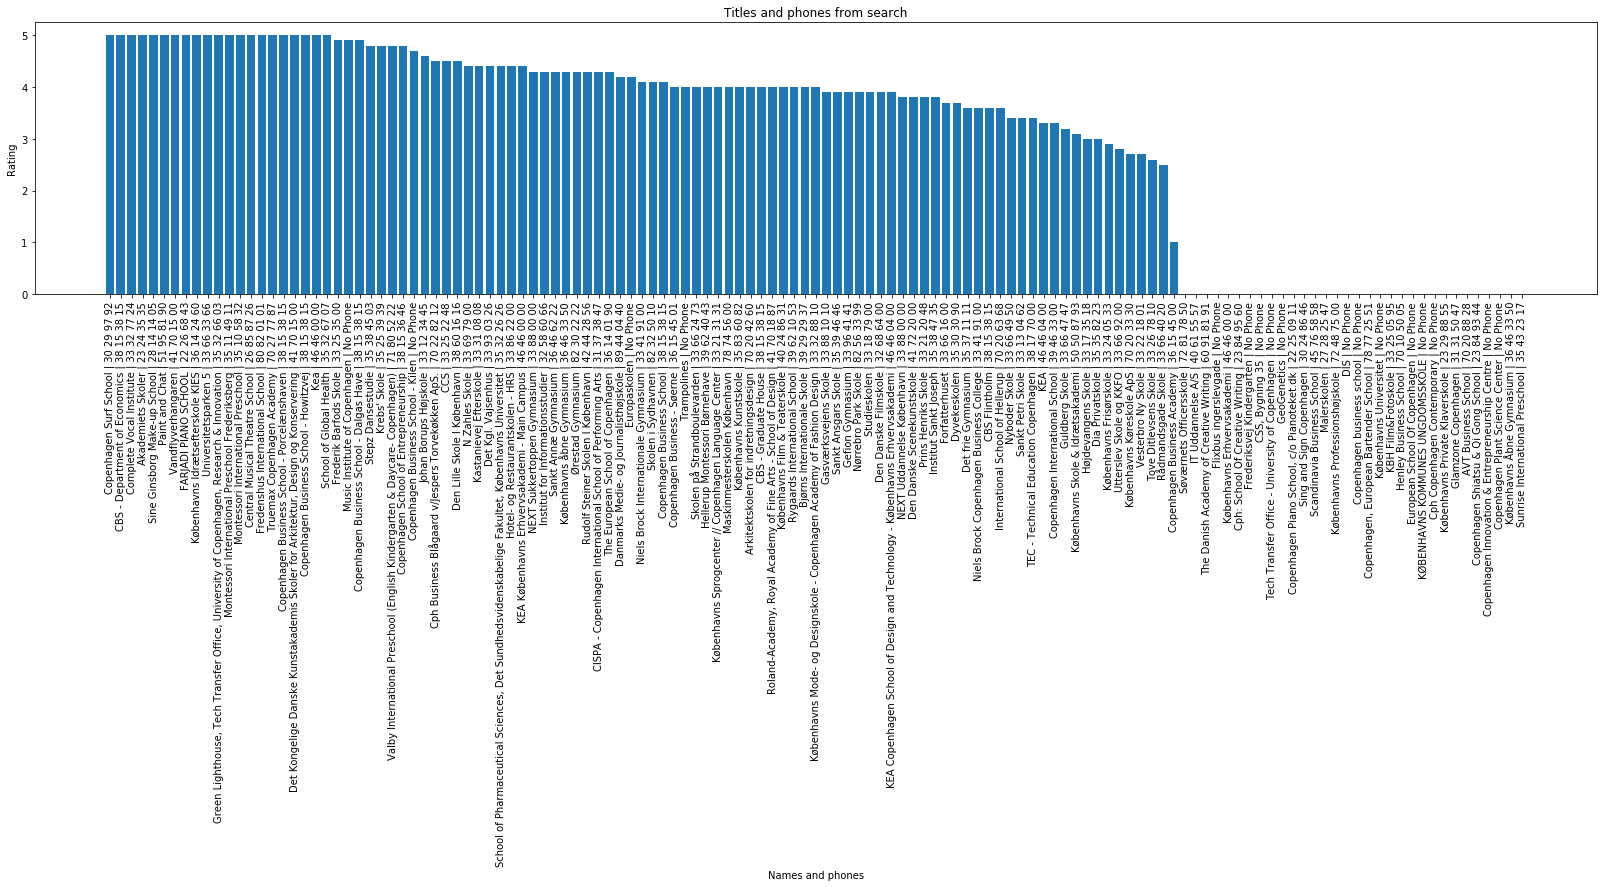

In [56]:
dataSorted = {k: v for k, v in sorted(search_results.items(), key=lambda item: item[1][1], reverse=False)}

xBar = []
for idx in dataSorted:
    xBar.append(idx + ' | ' + dataSorted[idx][0])

plt.figure(figsize=(28, 5))
plt.bar(xBar, [val[1] for val in dataSorted.values()])
plt.gca().invert_xaxis()
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.xlabel('Names and phones')
plt.title('Titles and phones from search')